# 08 __Network Analysis__

## __Basic definitions in Graphs__

A __Graph__ is defined as a set of _nodes_, which are an abstraction of any entities,
and the connecting links between pairs of nodes called _edges_ or _relationships_.
The edge between two nodes can be _directed_ or _undirected_.
A directed edge means that the edge points from one node to the other and not the
other way around.
Depending on whether the edges of a graph are directed or undirected, the graph is called
a _directed graph_ or an _undirected graph_, respectively.

The _degree_ of a node is the number of edges that connect to it.
If  anetwork is directed, then nodes have two different degrees, the _in-degree_, which
is the number of incoming edges, and the _out-degree_, which is the number of
outgoing edges.

In some cases, there is information we would like to add to graphs to model
properties of the entities that the nodes represent or their relationships. We could add
_strengths_ or _weights_ to the links between the nodes, to represent some real-world
measure.

We define a _path_ in a network to be a sequence of nodes
connected by edges. Moreover, many applications of graphs require shortest paths
to be computed. The shortest path problem is the problem of finding a path between
two nodes in a graph such that the length of the path or the sum of the weights of
edges in the path is minimized.

A graph is said to be _connected_ if for every pair of nodes, there is a path between
them. A graph is _fully connected_ or _complete_ if each pair of nodes is connected by
an edge. A _connected component_ or simply a _component_ of a graph is a subset of its
nodes such that every node in the subset has a path to every other one.

A _subgraph_ is a subset of the
nodes of a graph and all the edges linking those nodes. Any group of nodes can form
a subgraph.

## __Social Network Analysis__

Social network analysis processes social data structured in graphs. It involves the
extraction of several characteristics and graphics to describe the main properties of
the network. Some general properties of networks, such as the shape of the network
degree distribution (defined bellow) or the average path length, determine the type
of network, such as a small-world network or a scale-free network. A small-world
network is a type of graph in which most nodes are not neighbors of one another, but
most nodes can be reached from every other node in a small number of steps. This
is the so-called small-world phenomenon which can be interpreted by the fact that
strangers are linked by a short chain of acquaintances. In a small-world network,
people usually form communities or small groups where everyone knows everyone else. Such communities can be seen as complete graphs. In addition, most the
community members have a few relationships with people outside that community.
However, some people are connected to a large number of communities. These may
be celebrities and such people are considered as the hubs that are responsible for
the small-world phenomenon. Many small-world networks are also scale-free networks. In a scale-free network the node degree distribution follows a power law (a
relationship function between two quantities x and y defined as y = x n , where n is
a constant). The name scale-free comes from the fact that power laws have the same
functional form at all scales, i.e., their shape does not change on multiplication by a
scale factor. Thus, by definition, a scale-free network has many nodes with a very few
connections and a small number of nodes with many connections. This structure is
typical of the World Wide Web and other social networks. In the following sections,
we illustrate this and other graph properties that are useful in social network analysis.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


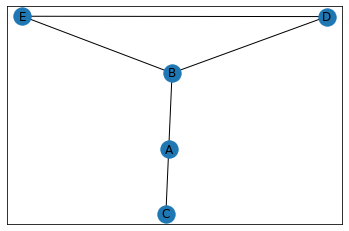

In [2]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('D', 'E')

nx.draw_networkx(G)

(-0.6359571289799321,
 0.7553994508661749,
 -1.1581838581677593,
 0.6646967930987994)

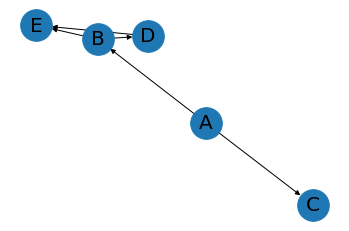

In [3]:
# To create a directed graph we use DiGraph:
G = nx.DiGraph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('D', 'E')
nx.draw_networkx(G, node_size = 1000, font_size = 20)
plt.axis('off')

(-1.0966246371239972,
 1.029117379603941,
 -1.0899099716547362,
 1.056366414684123)

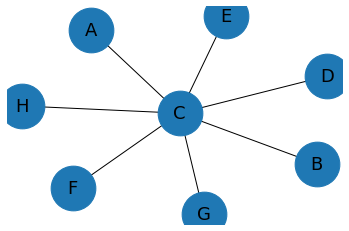

In [4]:
# Create a star graph
G = nx.Graph()
G.add_edge('A', 'C')
G.add_edge('B', 'C')
G.add_edge('D', 'C')
G.add_edge('E', 'C')
G.add_edge('F', 'C')
G.add_edge('G', 'C')
G.add_edge('H', 'C')

nx.draw_networkx(G, node_size = 2000, font_size = 18)
plt.axis('off')

### Data description of Facebook Network



Let's load the Facebook network into NetworkX. The network consists of an undirected and unweighted network that contains friendships between users of Facebook. The facebook dataset is defined by an edge list, so the file is a plain text file with one edge per line. The file is uncompressed and ready to load as follows.


In [5]:
fb = nx.read_edgelist('input/facebook_combined.txt')

In [6]:
# first extract info from graph without visualization
fb_n, fb_k = fb.order(), fb.size()
fb_avg_deg = fb_k / fb_n
print('nodes: ', fb_n)
print('edges: ', fb_k)
print('average degree: ', fb_avg_deg)

nodes:  4039
edges:  88234
average degree:  21.84550631344392


In [7]:
degrees = dict(fb.degree()).values()

Text(0.5, 1.0, 'Degree distribution')

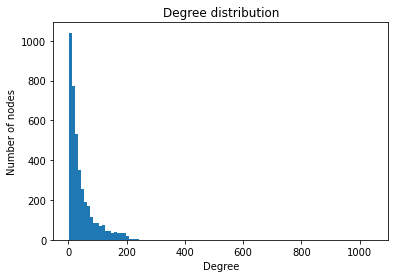

In [8]:
# plot the degree distribution
degree_hist = plt.hist(degrees, 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')



Networks with power-law distributions are called scale-free networks, because power laws have the same functional form at all scales.

Next, let us find out if the Facebook dataset contains one or more than one connected components.


In [9]:
print(nx.number_connected_components(fb))

1




Let us prune the graph removing node '0' (arbitrarily selected) and compute the number of connected components of the pruned version of the graph:


In [10]:
fb_prunned = nx.read_edgelist('input/facebook_combined.txt')
fb_prunned.remove_node('0')

In [11]:
print(fb_prunned.number_of_nodes())
print(nx.number_connected_components(fb_prunned))

4038
19


In [12]:
# let us see the sizes of the 19 connected components
fb_components = nx.connected_components(fb_prunned)
print('sizes of conencted components: ',  [len(c) for c in fb_components])

sizes of conencted components:  [4015, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1]


## __Centrality__

The __centrality__ of a node measures its relative importance within the graph. In this
section we focus on undirected graphs. Centrality concepts were first developed in
social network analysis. The first studies indicated that central nodes are probably
more influential, have greater access to information, and can communicate their
opinions to others more efficiently.

Thus, the applications of centrality concepts
in a social network include identifying the most influential people, the most informed
people, or the most communicative people. In practice, what centrality means will
depend on the application and the meaning of the entities represented as nodes in the
data and the connections between those nodes. Various measures of the centrality
of a node have been proposed. We present four of the best-known measures: _degree
centrality_, _betweenness centrality_, _closeness centrality_, and _eigenvector centrality_.

__Degree centrality__ is defined as the number of edges of the node. So the more ties a
node has, the more central the node is. To achieve a normalized degree centrality of a
node, the measure is divided by the total number of graph nodes (n) without counting
this particular one (n − 1). The normalized measure provides proportions and allows
us to compare it among graphs. Degree centrality is related to the capacity of a node
to capture any information that is floating through the network. In social networks,
connections are associated with positive aspects such as knowledge or friendship.

__Betweenness centrality__ quantifies the number of times a node is crossed along
the shortest path/s between any other pair of nodes. For the normalized measure
this number is divided by the total number of shortest paths for every pair of nodes.
Intuitively, if we think of a public bus transportation network, the bus stop (node)
with the highest betweenness has the most traffic. In social networks, a person with
high betweenness has more power in the sense that more people depend on him/her
to make connections with other people or to access information from other people.
Comparing this measure with degree centrality, we can say that degree centrality
depends only on the node’s neighbors; thus, it is more local than the betweenness
centrality, which depends on the connection properties of every pair of nodes in the
graph, except pairs with the node in question itself. The equivalent measure exists
for edges. The betweenness centrality of an edge is the proportion of the shortest
paths between all node pairs which pass through it.

__Closeness centrality__ tries to quantify the position a node occupies in the network
based on a distance calculation. The distance metric used between a pair of nodes
is defined by the length of its shortest path. The closeness of a node is inversely
proportional to the length of the average shortest path between that node and all the
other nodes in the graph. In this case, we interpret a central node as being close to,
and able to communicate quickly with, the other nodes in a social network.

__Eigenvector centrality__ defines a relative score for a node based on its connections
and considering that connections from high centrality nodes contribute more to the
score of the node than connections from low centrality nodes. It is a measure of the
influence of a node in a network, in the following sense: it measures the extent to
which a node is connected to influential nodes. Accordingly, an important node is
connected to important neighbors.

An important concept in social network analysis is that of a hub node, which is
defined as a node with high degree centrality and betweenness centrality. When a
hub governs a very centralized network, the network can be easily fragmented by
removing that hub.

In [16]:
# ten most central nodes in the entwork
degree_cent_fb = nx.degree_centrality(fb)
print('facebook degrre centrality: ', sorted(degree_cent_fb.items(), key = lambda x:x[1], reverse = True)[:10])

facebook degrre centrality:  [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163), ('3437', 0.13546310054482416), ('0', 0.08593363051015354), ('2543', 0.07280832095096582), ('2347', 0.07206537890044576), ('1888', 0.0629024269440317), ('1800', 0.06067360079247152), ('1663', 0.058197127290737984)]


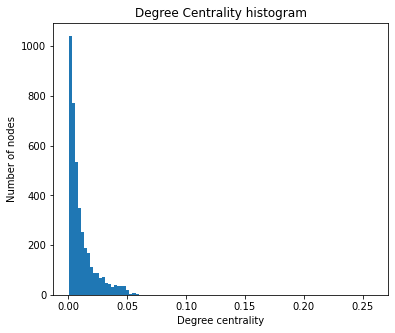

In [17]:
# degree centrality histogram
fig = plt.figure(figsize = (6, 5))

degree_hist = plt.hist(list(degree_cent_fb.values()), 100)
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree Centrality histogram')
plt.savefig('output/degree_centrality_hist.png', dpi = 330, bbox_inches = 'tight')

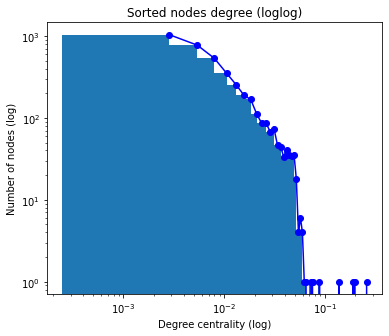

In [20]:
# let us compute the degtee histogram and plot using log scale
fig = plt.figure(figsize = (6, 5))
degree_hist = plt.hist(list(degree_cent_fb.values()), 100)
plt.loglog(degree_hist[1][1:], degree_hist[0], 'b', marker = 'o')
plt.ylabel('Number of nodes (log)')
plt.xlabel('Degree centrality (log)')
plt.title('Sorted nodes degree (loglog)')
plt.savefig('output/degree_entrality_hist_log.png', dpi = 300, bbox_inches = 'tight')



There is an interesting (large) cluster which corresponds to low degrees. The representation using a logarithmic scale is useful to distinguish the members of this cluster, which are clearly visible as a straight line at lower x-axis values (upper left-hand part). We can conclude that most of the nodes in the graph have low degree centrality; only a few of them have high degree centrality. These latter nodes can be properly seen as the points in the bottom right-hand part of the logarithmic plot.

Let's compute the other centrality measures: betweenness, closeness and eigenvector. We sort the results to see which nodes are more central.


In [21]:
betweenness_fb = nx.betweenness_centrality(fb)
closeness_fb = nx.closeness_centrality(fb)
eigencentrality_fb = nx.eigenvector_centrality(fb)

In [22]:
print(
    'facebook betweenness centrality: ', sorted(betweenness_fb.items(), key = lambda x:x[1], reverse = True)[:10]
)

print(
    'facebook closeness centrality: ', sorted(closeness_fb.items(), key = lambda x:x[1], reverse = True)[:10]
)

print(
    'facebook eigenvetor centrality: ', sorted(eigencentrality_fb.items(), key = lambda x:x[1], reverse = True)[:10]
)

facebook betweenness centrality:  [('107', 0.4805180785560152), ('1684', 0.3377974497301992), ('3437', 0.23611535735892905), ('1912', 0.2292953395868782), ('1085', 0.14901509211665306), ('0', 0.14630592147442917), ('698', 0.11533045020560802), ('567', 0.09631033121856215), ('58', 0.08436020590796486), ('428', 0.06430906239323866)]
facebook closeness centrality:  [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796), ('171', 0.37049270575282134), ('348', 0.36991572004397216), ('483', 0.3698479575013739), ('414', 0.3695433330282786), ('376', 0.36655773420479304)]
facebook eigenvetor centrality:  [('1912', 0.09540696149067629), ('2266', 0.08698327767886553), ('2206', 0.08605239270584343), ('2233', 0.08517340912756598), ('2464', 0.08427877475676092), ('2142', 0.08419311897991796), ('2218', 0.08415573568055032), ('2078', 0.08413617041724979), ('2123', 0.08367141238206226), ('1993', 0.083532428408159



As can be seen in the results, the four measures differ in their ordering. Although the node '107' is the most central node for degree, betweenness and closeness centrality it is not for eigenvector centrality. The second most central node is different for closeness and eigenvector centralities; while the third most central node is different for all four centrality measures.





Another interesting measure is the current flow betweenness centrality, also called random walk centrality, of a node. It can be defined as the probability of passing through the node in question on a random walk starting and ending at some node. In this way, the betweenness is not computed as a function of shortest paths, but of all paths. This makes sense for some social networks where messages may get to where they are going not by the shortest path, but by a random path, as in the case of gossip floating through a social network for example.

## __Drawing Centrality in Graphs__


Drawing Centrality in Graphs

Let us explore some visualizations of the Facebook Network. Graph visualization can help in the network data understanding and usability.

The visualization of a network with a large amount of nodes is a complex task. Different layouts can be used to try to build a proper visualization. For instance, we can draw the Facebook graph using the random layout, but this is a bad option, as can be seen below:


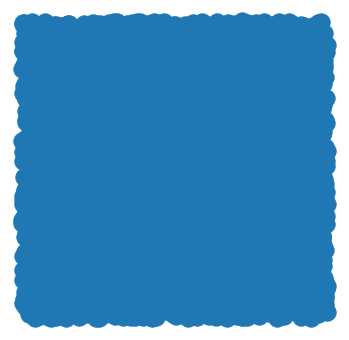

In [34]:
fig = plt.figure(figsize = (6, 6))

pos = nx.random_layout(fb)
nx.draw_networkx(fb, pos, with_labels = False)
plt.axis('off')

plt.savefig('output/facebook_random.png', dpi = 300)

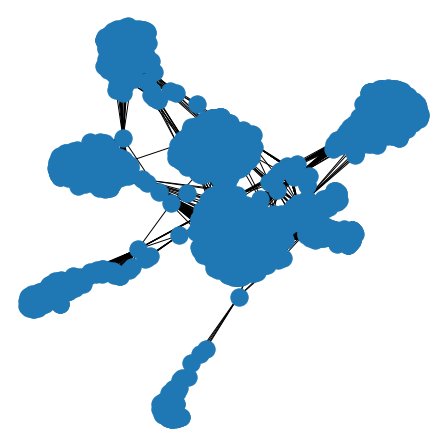

In [37]:
# draw graph with default options
fig = plt.figure(figsize =(6, 6), edgecolor = 'k')
nx.draw(fb, edgecolor = 'k')

plt.savefig('output/facebook_default.png', dpi = 300)



Let us try to define better ways to shape the graph and also to fine tune the parameters. We draw centrality measures on the whole Facebook Network. For that, we compute the position of the nodes using Spring Layout and then we draw the four measures of Centrality.

The function nx.spring_layout returns the position of the nodes using the Fruchterman–Reingold force-directed algorithm. This algorithm distributes the graph nodes in such a way that all the edges are more or less equally long and they cross themselves as few times as possible. Moreover, we can change the size of the nodes to that defined by their degree centrality.


In [38]:
pos_fb = nx.spring_layout(fb, iterations = 1000)

In the next code, the degree centrality is normalized to values between 0 and 1, and multiplied by a constant to make the sizes appropriate for the format of the figure.

(-0.41745205074548714,
 0.6561631396412848,
 -0.6395758867263794,
 1.0780749797821045)

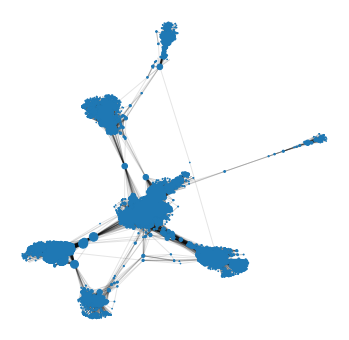

In [39]:
fig = plt.figure(figsize = (6,6))
nsize = np.array([v for v in degree_cent_fb.values()])
cte = 500
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize, with_labels = True)
edges=nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1, with_labels = True)
plt.axis('off') 

(-0.41745205074548714,
 0.6561631396412848,
 -0.6395758867263794,
 1.0780749797821045)

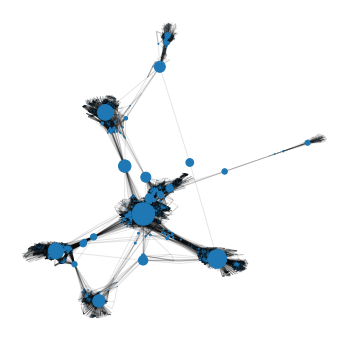

In [40]:
fig = plt.figure(figsize=(6,6))

# Betweenness Centrality
nsize = np.array([v for v in betweenness_fb.values()])
nsize = cte*(nsize  - min(nsize))/(max(nsize) - min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize)
edges=nx.draw_networkx_edges(fb, pos = pos_fb,alpha = .1)
plt.axis('off') 

(-0.41745205074548714,
 0.6561631396412848,
 -0.6395758867263794,
 1.0780749797821045)

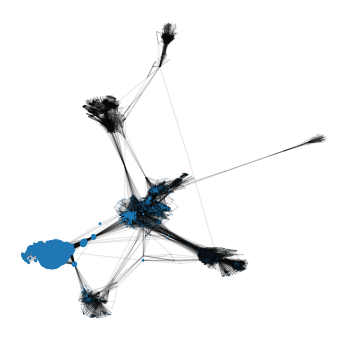

In [41]:
fig = plt.figure(figsize=(6,6))

# Eigenvector Centrality
nsize = np.array([v for v in eigencentrality_fb.values()])
nsize = cte*(nsize  - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize)
edges = nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1)
plt.axis('off') 

(-0.41745205074548714,
 0.6561631396412848,
 -0.6395758867263794,
 1.0780749797821045)

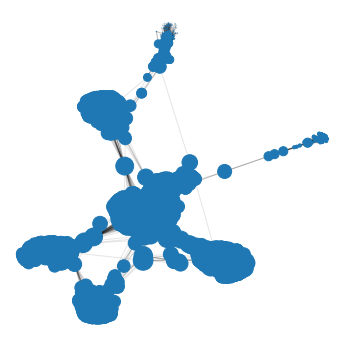

In [42]:
fig = plt.figure(figsize=(6,6))

# Closeness Centrality
nsize = np.array([v for v in closeness_fb.values()])
nsize = cte*(nsize  - min(nsize))/(max(nsize) - min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize)
edges=nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1)
plt.axis('off') 



These graph visualizations allow us to understand the network better. Now we can distinguish several groups of nodes or "communities" more clearly in the graph. Moreover, the more central nodes are the larger more prominent nodes, which are highly connected.

Generally different centrality metrics will be positively correlated, but when they are not, there is probably something interesting about the network nodes. For instance, if you can spot nodes with high betweenness but relatively low degree, these are the nodes with few links but which are crucial for network flow. We can also look for the opposite effect: nodes with high degree but relatively low betweenness. These nodes are those with redundant communication.


## __Pagerank__

Pagerank is an algorithm related to the concept of eigenvector centrality in directed graphs. It is used to rate webpages objectively and effectively measure the attention devoted to them. Pagerank was invented by Larry Page and Sergey Brin, and became a Google trademark in 1998. Assigning the importance of a webpage is a subjective task, which depends on the interests and knowledge of the browsers. However, there are ways to objectively rank the relative importance of webpages. Intuitively, a page has a high rank if the sum of the ranks of its incoming edges is high. This considers both cases when a page has many incoming links and when a page has a few highly ranked incoming links. Nowadays, a variant of the algorithm is used by Google. It does not only use information on the number of links pointing into and out of a website, but uses many more variables.


Let us compute the Pagerank vector of the Facebook network and use it to define the size of the nodes, as was done above. The code below outputs the graph that emphasizes some of the nodes with high Pagerank:

(-0.41745205074548714,
 0.6561631396412848,
 -0.6395758867263794,
 1.0780749797821045)

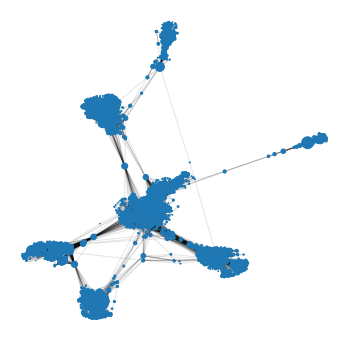

In [43]:
fig = plt.figure(figsize = (6,6))

# Pagerank 
pr=nx.pagerank(fb, alpha = 0.85)
nsize=np.array([v for v in pr.values()])
cte = 500
nsize = cte*(nsize  - min(nsize))/(max(nsize) - min(nsize))
nodes=nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize)
edges=nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1)
plt.axis('off') 

## Ego-networks of the Facebook Network


Ego-networks are subnetworks of neighbors that are centered on a certain node. In Facebook and LinkedIn, these are described as _your network_. Every person in an ego-network has her/his own ego-network and can only access the nodes in it. All ego-networks interlock to form the whole social network. The ego-network definition depends on the network distance considered. In the basic case, a link means that person A is a friends of person B, a distance of 2 means that a person, C, is a friend of a friend of A, and a distance of 3 means that another person, D, is a friend of a friend of a friend of A. Knowing the size of an ego-network is important when it comes to understanding the reach of the information that a person can transmit or have access to.

(-1.0894646124861918,
 0.8787568622100276,
 -1.0887265591698307,
 1.0037897925661117)

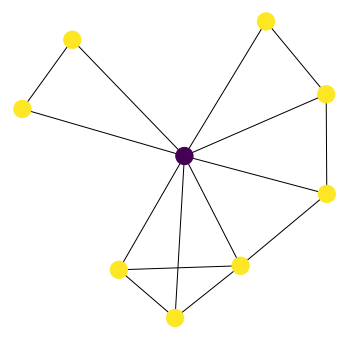

In [44]:
fig = plt.figure(figsize=(6,6))

# Example of ego network:
G = nx.Graph()
G.add_edge('A', 'C');
G.add_edge('A', 'B');
G.add_edge('A', 'D');
G.add_edge('A', 'E');
G.add_edge('A', 'F');
G.add_edge('A', 'G');
G.add_edge('A', 'H');
G.add_edge('A', 'I');
G.add_edge('D', 'C');
G.add_edge('E', 'F');
G.add_edge('G', 'H');
G.add_edge('G', 'I');
G.add_edge('H', 'C');
G.add_edge('H', 'D');
G.add_edge('B', 'I');
c=[1, 2, 2, 2, 2, 2, 2, 2, 2]
nx.draw_networkx(G,  with_labels = False, node_color = c)
plt.axis('off') 

Our Facebook network is divided into a set of 10 ego-networks which are interconnected to form the fully connected graph we have been analyzing in previous sections. The dataset includes the information of these 10 manually defined ego-networks. In particular, we have available the list of the 10 ego nodes: '0', '107', '348', '414', '686', '1684', '1912', '3437', '3980' and their connections. Above we saw that node '107' is the most central node for three of the four centrality measures computed. So, let us extract the ego-networks of the popular node '107' with a distance of 1 and 2, and compute their sizes. NetworkX has a function devoted to this task:

In [45]:


# Automatically compute ego-network
ego_107 = nx.ego_graph(fb, '107')
print('# nodes of the ego graph 107:', len(ego_107))
print('# nodes of the ego graph 107 with radius up to 2:', len(nx.ego_graph(fb, '107', radius = 2)))



# nodes of the ego graph 107: 1046
# nodes of the ego graph 107 with radius up to 2: 2687
